In [ ]:
# Importar librerías necesarias
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline

Loading the dataset

In [ ]:
drive.mount('/content/drive')
print(cv2.__version__)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
4.1.2


In [ ]:
iris_dataset = pd.read_csv('/content/drive/My Drive/MachineLearning/Classes/Aprendizaje automático/S1 - Introduction/Iris.csv')
# DataFrame

In [ ]:
display(iris_dataset.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print("Target names:", np.unique(iris_dataset['Species']))
print("Keys of iris_dataset:\n", iris_dataset.keys())
print("Feature names:\n", iris_dataset.keys()[1:5])

Target names: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Keys of iris_dataset:
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Feature names:
 Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [ ]:
X = iris_dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # We need to index the columns using a list [feature names]
print("First samples of the feature matrix: \n", X.loc[0:4, :])
Y = iris_dataset['Species']
y = pd.factorize(Y)
#print("First target values: \n", Y.loc[30:70])
print("First numeric target values: \n", y[1])

First samples of the feature matrix: 
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
First numeric target values: 
 Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


Measuring Performance: Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y[0], test_size= 0.25, random_state = 0)

In [ ]:
print("Training feature matrix size: ", X_train.shape)
#print(X_train.head())
print("Test feature matrix size: ", X_test.shape)
#print(X_test.head())
print("Training target vector size: ", y_train.shape)
#print(y_train.head())
print("Test target vector size: ", y_test.shape)
#print(y_test.head())

Training feature matrix size:  (112, 4)
Test feature matrix size:  (38, 4)
Training target vector size:  (112,)
Test target vector size:  (38,)


In [ ]:
# Create the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors =1)


In [ ]:
# Train the model
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# Make a prediction
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)
prediction = model_knn.predict(X_new)
print("Prediction:", y[1][prediction])

X_new.shape: (1, 4)
Prediction: Index(['Iris-setosa'], dtype='object')


In [ ]:
# Evaluate the model
y_pred = model_knn.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [ ]:
print("Test set score: {:.2f}".format(model_knn.score(X_test, y_test)))

Test set score: 0.97


Analysing  the KNeighborsClassifier

In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 8.3MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=ed2cbe15cbced7f28ab521fde184c5292f6f91e9c241cb0580743186d0e63ba2
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
zobj=zip([1, 8, 4],['rr', 'tt', 'gg'])
print([x for x in zobj])

[(1, 'rr'), (8, 'tt'), (4, 'gg')]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


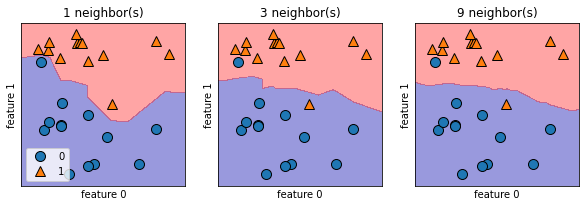

In [ ]:
import mglearn
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
display(cancer.keys())
print('target_names: ',cancer['target_names'])
print('Data: ', cancer['data'].shape)
print('Target: ', cancer['target'].shape)
#print('FEATURE names: ',cancer['feature_names'])
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

target_names:  ['malignant' 'benign']
Data:  (569, 30)
Target:  (569,)


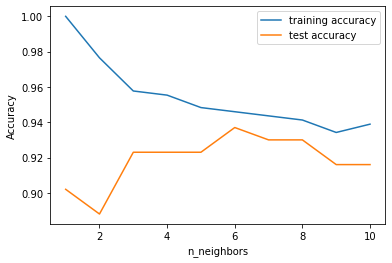

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

#print('training_accuracy: ', training_accuracy)
#print('test_accuracy: ', test_accuracy)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Confusion matrix

In [ ]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)



In [ ]:
from sklearn.metrics import confusion_matrix # y_test is the groundtruth
cm = confusion_matrix(y_test, y_pred_test)
display(cm)

array([[48,  5],
       [ 4, 86]])

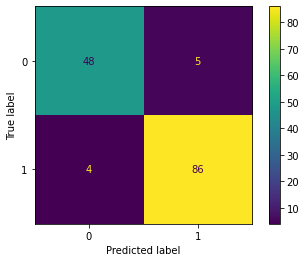

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test) 